#**LAB 6 : Regression**

**Regression is generally used for curve fitting task. Here we will demonstrate regression task for the following :**

1. Fitting of a Line (One Variable and Two Variables)
2. Fitting of a Plane
3. Fitting of M-dimensional hyperplane
4. Practical Example of Regression task

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Fitting of a Line (One Variable)

**Generation of line data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=10$ and $w_{1}=1$ and generate y
3. Plot ($x$,$y$)

Text(0.5, 1.0, 'Plot of x vs y')

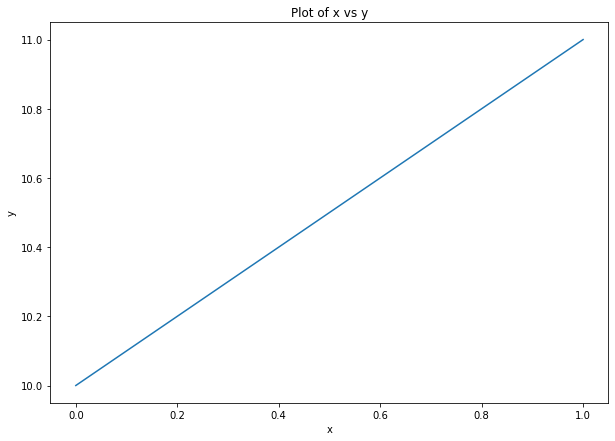

In [2]:
## Write your code here
x = np.linspace(start=0, stop=1, num=1000)
w = np.array([10, 1])
y = np.transpose(np.append(np.ones((1000)), x).reshape(2, 1000)) @ w

plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x vs y")

**Corruption of data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1.
3. Plot ($x$,$y_{cor}$) (use scatter plot)

(1000,)


Text(0.5, 1.0, 'Plot of x vs y_cor')

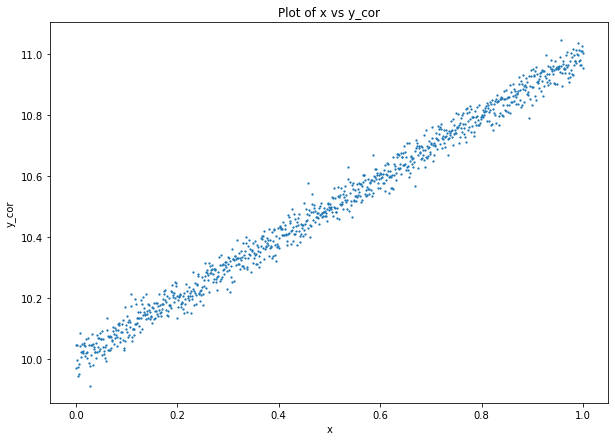

In [3]:
## Write your code here
y_cor = np.add(y, np.random.normal(0, 0.03, size=(1000,)))
print(y_cor.shape)

plt.figure(figsize=(10, 7))
plt.scatter(x, y_cor, s=1.5)
plt.xlabel("x")
plt.ylabel("y_cor")
plt.title("Plot of x vs y_cor")

**Heuristically predicting the curve (Generating the Error Curve)**

1. Keep $w_{0}=10$ as constant and find $w_{1}$
2. Create a search space from -5 to 7 for $w_{1}$, by generating 1000 numbers between that
3. Find $y_{pred}$ using each value of $w_{1}$
4. The $y_{pred}$ that provide least norm error with y, will be decided as best $y_{pred}$
$$error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2$$
5. Plot error vs search_$w1$
6. First plot the scatter plot ($x$,$y_{cor}$) , over that plot ($x$,$y_{bestpred}$)

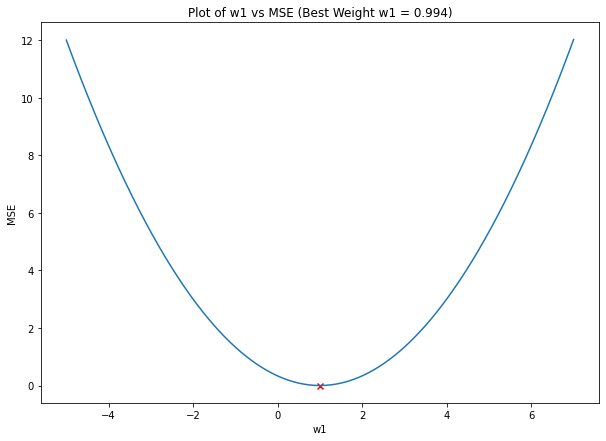

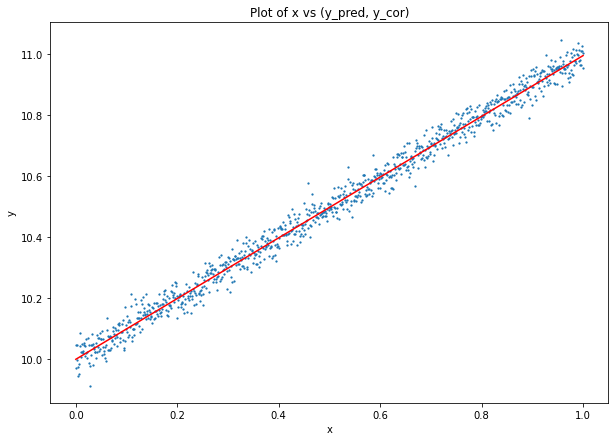

In [4]:
## Write your code here
w0_guess = 10
w1_space = np.linspace(-5, 7, 1000)
w_best = None
best_error = float('inf')

errors = []

for w1 in w1_space:
    w = np.array([w0_guess, w1])
    y_pred = np.append(np.ones((1000)), x).reshape(2, 1000).T @ w
    error = np.sum(np.subtract(y_cor, y_pred)**2)/1000
    errors.append(error)
    if error<best_error:
        w_best = w
        best_error = error
    
errors = np.array(errors)

plt.figure(figsize=(10, 7))
plt.plot(w1_space, errors)
plt.scatter(w_best[1], best_error, marker='x', c='red')
plt.xlabel("w1")
plt.ylabel("MSE")
plt.title(f'Plot of w1 vs MSE (Best Weight w1 = {round(w_best[1], 4)})')
plt.show()

y_pred = np.transpose(np.append(np.ones((1000)), x).reshape(2, 1000)) @ w_best

plt.figure(figsize=(10, 7))
plt.plot(x, y_pred, c='red')
plt.scatter(x, y_cor, s=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x vs (y_pred, y_cor)")
plt.show()


**Using Gradient Descent to predict the curve**

1. $Error=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}})^2=\frac{1}{m}\sum_{i=1}^{M}(y_{i}-(w_{0}+w_{1}x_{i}))^2$

2. $\nabla Error|_{w1}=\frac{-2}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

3. $w_{1}|_{new}=w_{1}|_{old}-\lambda \nabla Error|_{w1}=w_{1}|_{old}+ \frac{2\lambda}{M}\sum_{i=1}^{M}(y_{i}-y_{pred_{i}}) \times x_{i}$

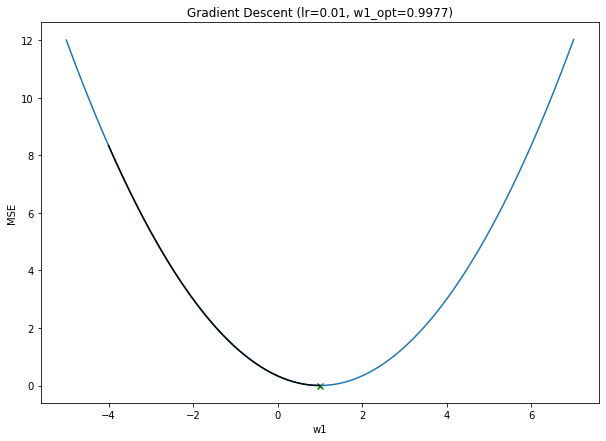

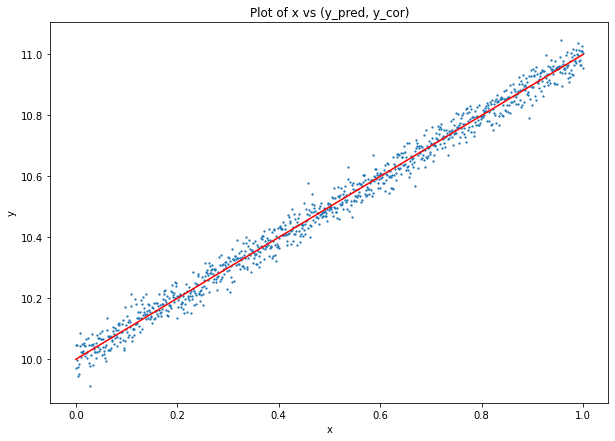

In [5]:
## Write your code here
tol = 1e-6
max_iter = int(1e5)
_lambda = 0.01

w0_guess = 10
w1_init = -4

errors2 = []
w1_vals = []

X = np.transpose(np.append(np.ones((1000)), x).reshape(2, 1000))

for i in range(max_iter):
    w = np.array([w0_guess, w1_init])
    y_pred = X @ w
    
    error = np.sum(np.subtract(y_cor, y_pred)**2)/1000
    errors2.append(error)
    w1_vals.append(w1_init)
    
    grad = 2* np.dot(x, (y_pred - y_cor))/1000
    w1_init = w1_init - _lambda * grad
    
    if abs(grad)<tol: break

plt.figure(figsize=(10, 7))
plt.plot(w1_space, errors)
plt.plot(w1_vals, errors2, c='black')
plt.scatter(w1_init, error, c='green', marker='x')
plt.xlabel("w1")
plt.ylabel("MSE")
plt.title(f"Gradient Descent (lr={_lambda}, w1_opt={round(w1_init, 4)})")
plt.show()

y_pred = X @ w
plt.figure(figsize=(10, 7))
plt.plot(x, y_pred, c='red')
plt.scatter(x, y_cor, s=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x vs (y_pred, y_cor)")
plt.show()

#Fitting of a Line (Two Variables)

**Generation of Line Data ($y=w_{1}x+w_{0}$)**

1. Generate $x$, 1000 points from 0-1
2. Take $w_{0}=5$ and $w_{1}=1.5$ and generate $y$
3. Plot ($x$,$y$)

Text(0.5, 1.0, 'Plot of x vs y')

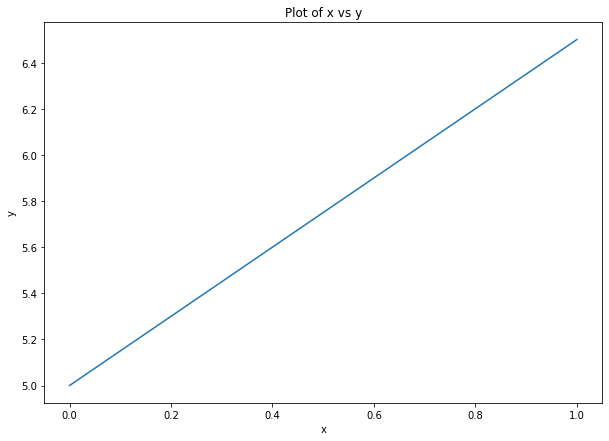

In [6]:
## Write your code here
x = np.linspace(start=0, stop=1, num=1000)
w = np.array([5, 1.5])
y = np.transpose(np.append(np.ones((1000)), x).reshape(2, 1000)) @ w

plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x vs y")

**Corrupt the data using uniformly sampled random noise**

1. Generate random numbers uniformly from (0-1) with same size as $y$
2. Corrupt $y$ and generate $y_{cor}$ by adding the generated random samples with a weight of 0.1
3. Plot ($x$,$y_{cor}$) (use scatter plot)

(1000,)


Text(0.5, 1.0, 'Plot of x vs y_cor')

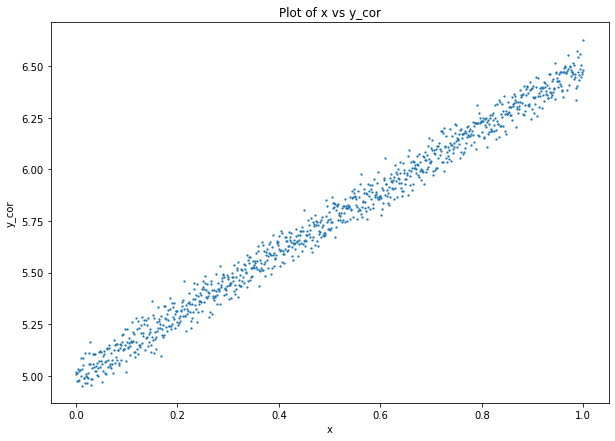

In [7]:
## Write your code here
y_cor = np.add(y, np.random.normal(0, 0.05, size=(1000,)))
print(y_cor.shape)

plt.figure(figsize=(10, 7))
plt.scatter(x, y_cor, s=1.5)
plt.xlabel("x")
plt.ylabel("y_cor")
plt.title("Plot of x vs y_cor")

**Plot the Error Surface**

1. we have all the data points available in $y_{cor}$, now we have to fit a line with it. (i.e from $y_{cor}$ we have to predict the true value of $w_{1}$ and $w_{0}$)
2. Take $w_{1}$ and $w_{0}$ from -10 to 10, to get the error surface

Text(0, 0.5, 'w1')

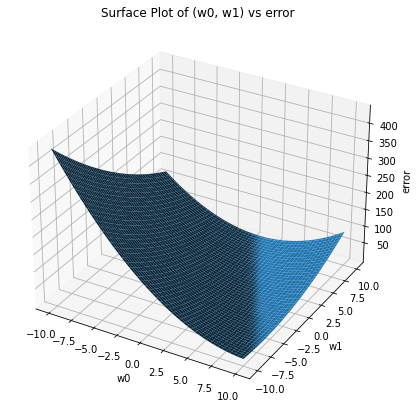

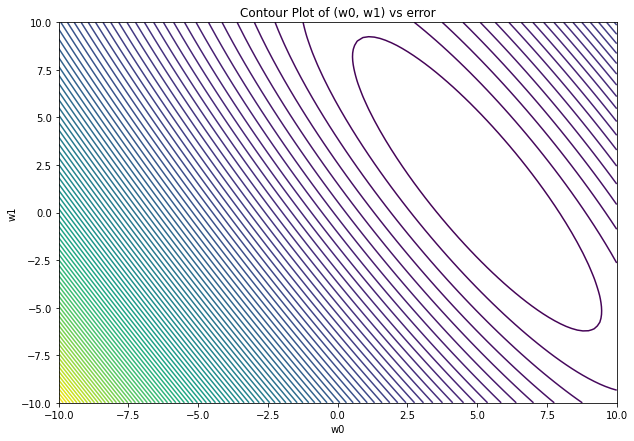

In [8]:
## Write your code here

w0 = np.linspace(-10, 10, 100)
w1 = np.linspace(-10, 10, 100)
X = np.append(np.ones((1000)), x).reshape(2, 1000)

def cost(w0, w1):
    w = np.array([w0, w1])
    y_pred = X.T @ w
    return np.sum(np.subtract(y_cor, y_pred)**2)/1000

W0, W1 = np.meshgrid(w0, w1)

W1.shape, W0.shape

errors = np.array([cost(w0_i, w1_i) for w0_i, w1_i in zip(np.ravel(W0), np.ravel(W1))]).reshape(100, 100)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

ax.plot_surface(W0, W1, errors)

ax.set_title("Surface Plot of (w0, w1) vs error")
ax.set_xlabel('w0')
ax.set_ylabel('w1')
ax.set_zlabel('error')

fig, ax = plt.subplots(figsize=(10, 7))

ax.contour(W0, W1, errors, 100)

ax.set_title("Contour Plot of (w0, w1) vs error")
ax.set_xlabel('w0')
ax.set_ylabel('w1')

**Gradient Descent to find optimal Values**

Optimal value of w0 is : 5.000202769685587
Optimal value of w1 is : 1.501624737233497
[[1.       0.      ]
 [1.       0.001001]
 [1.       0.002002]
 ...
 [1.       0.997998]
 [1.       0.998999]
 [1.       1.      ]] [5.00020277 1.50162474]


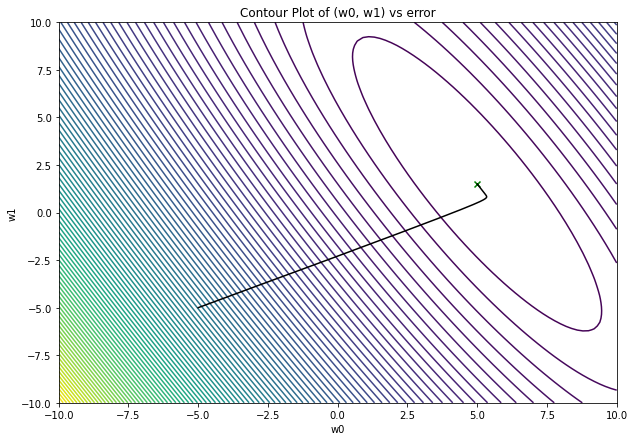

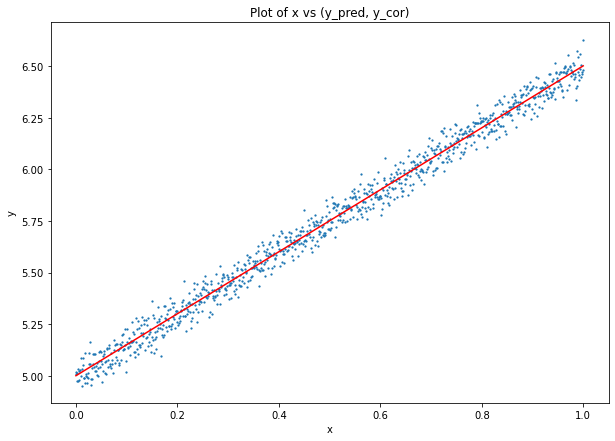

In [9]:
## Write your code here
tol = 1e-6
max_iter = int(1e5)
_lambda = 0.1

w_init = np.array([-5, -5])

errors2 = []
w_vals = []

X = np.append(np.ones((1000)), x).reshape(2, 1000)

for i in range(max_iter):
    y_pred = X.T @ w_init
    
    error_temp = np.sum(np.subtract(y_cor, y_pred)**2)/1000
    errors2.append(error_temp)
    w_vals.append(w_init.copy())
    
    grad = 2*(X @ (y_pred - y_cor))/1000
    w_init = w_init - _lambda * grad
    
    if np.sum(grad**2)<tol: break

print(f'Optimal value of w0 is : {w_init[0]}')
print(f'Optimal value of w1 is : {w_init[1]}')

fig, ax = plt.subplots(figsize=(10, 7))

w_vals_plot = np.array(w_vals)
ax.contour(W0, W1, errors, 100)
ax.plot(w_vals_plot[:, 0], w_vals_plot[:, 1], c='black')
ax.scatter(w_init[0], w_init[1], c='green', marker='x')

ax.set_title("Contour Plot of (w0, w1) vs error")
ax.set_xlabel('w0')
ax.set_ylabel('w1')

y_pred = X.T @ w_init
print(X.T, w_init)
plt.figure(figsize=(10, 7))
plt.plot(x, y_pred, c='red')
plt.scatter(x, y_cor, s=1.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Plot of x vs (y_pred, y_cor)")
plt.show()

#Fitting of a Plane

**Generation of plane data**

1. Generate $x_{1}$ and $x_{2}$ from range -1 to 1, (30 samples)
2. Equation of plane $y=w_{0}+w_{1}x_{1}+w_{2}x_{2}$
3. Here we will fix $w_{0}$ and will learn $w_{1}$ and $w_{2}$

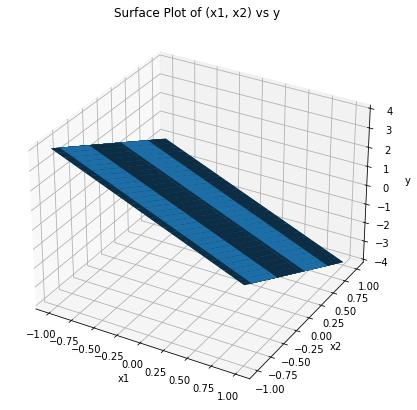

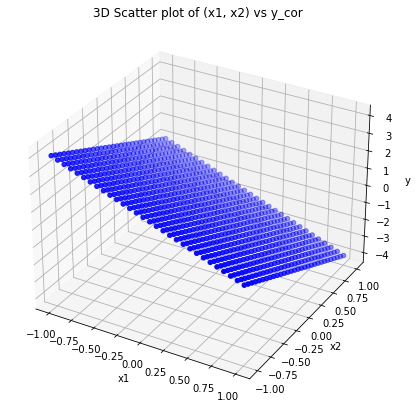

In [44]:
## Write your code here
x1 = np.linspace(-1, 1, 30)
x2 = np.linspace(-1, 1, 30)

np.random.shuffle(x2)

w = np.array([0, -2, -2])

X1, X2 = np.meshgrid(x1, x2)

y = -2*X1 -2*X2

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

ax.plot_surface(X1, X2, y)

ax.set_title("Surface Plot of (x1, x2) vs y")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

ax.scatter3D(X1, X2, y, color = "blue")
plt.title("3D Scatter plot of (x1, x2) vs y_cor")
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

X = np.concatenate((np.ones(30), x1, x2), axis=0, dtype=object).reshape(3, 30).T
y_cor = X @ w

**Generate the Error Surface**

1. Vary $w_{1}$ and $w_{2}$ and generate the error surface and find their optimal value 
2. Also plot the Contour

Text(0, 0.5, 'w2')

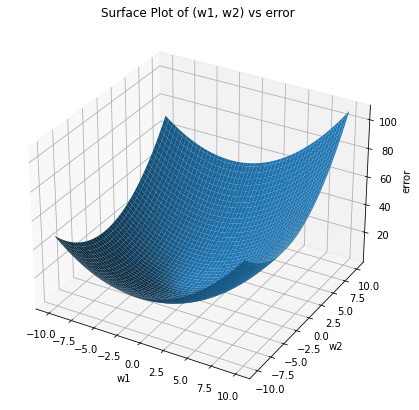

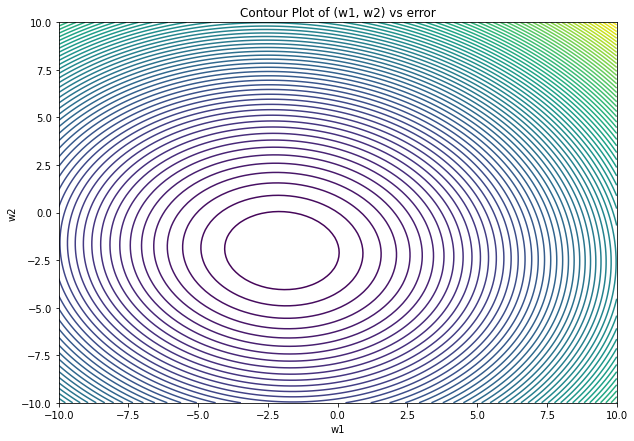

In [45]:
## Write your code here
w0 = 0
def cost(w1_i, w2_i):
    w = np.array([w0, w1_i, w2_i])
    y_pred = X @ w
    return np.sum(np.subtract(y_cor, y_pred)**2)/30

w1 = np.linspace(-10, 10, 100)
w2 = np.linspace(-10, 10, 100)

W1, W2 = np.meshgrid(w1, w2)

W1.shape, W2.shape

errors = np.array([cost(w1_i, w2_i) for w1_i, w2_i in zip(np.ravel(W1), np.ravel(W2))]).reshape(100, 100)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 7))

ax.plot_surface(W1, W2, errors)

ax.set_title("Surface Plot of (w1, w2) vs error")
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('error')

fig, ax = plt.subplots(figsize=(10, 7))

ax.contour(W1, W2, errors, 100)

ax.set_title("Contour Plot of (w1, w2) vs error")
ax.set_xlabel('w1')
ax.set_ylabel('w2')

**Prediction using Gradient Descent**

Optimal value of w1 is : -1.9980988981737755
Optimal value of w2 is : -2.0012388098343017


Text(0, 0.5, 'w2')

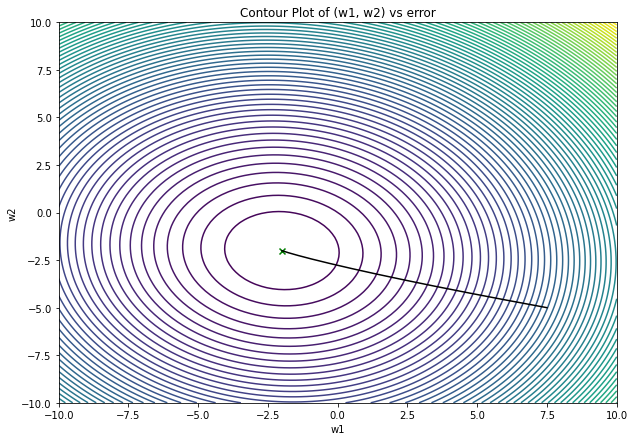

In [46]:
## Write your code here
tol = 1e-6
max_iter = int(1e5)
_lambda = 0.1

w_init = np.array([0, 7.5, -5])

errors2 = []
w_vals = []

for i in range(max_iter):
    y_pred = X @ w_init
    
    error_temp = np.sum(np.subtract(y_cor, y_pred)**2)/50
    errors2.append(error_temp)
    w_vals.append(w_init.copy())
    
    grad = 2*(X.T @ (y_pred - y_cor))/50
    w_init = w_init - _lambda * grad
    
    if np.sum(grad**2)<tol: break

print(f'Optimal value of w1 is : {w_init[1]}')
print(f'Optimal value of w2 is : {w_init[2]}')

fig, ax = plt.subplots(figsize=(10, 7))

w_vals_plot = np.array(w_vals)
ax.contour(W1, W2, errors, 100)
ax.plot(w_vals_plot[:, 1], w_vals_plot[:, 2], c='black')
ax.scatter(w_init[1], w_init[2], c='green', marker='x')

ax.set_title("Contour Plot of (w1, w2) vs error")
ax.set_xlabel('w1')
ax.set_ylabel('w2')

#Fitting of M-dimentional hyperplane (M-dimention, both in matrix inversion and gradient descent)


Here we will vectorize the input and will use matrix method to solve the regression problem.

let we have M- dimensional hyperplane we have to fit using regression, the inputs are $x1, x2, x3,...,x_M$. in vector form we can write $[x1,x2,...,x_M]^{T}$, and similarly the weights are $w1, w2, ...w_M$ can be written as a vector $[w1,w2,...w_M]^{T}$ , Then the equation of the plane can be written as:
$$y=w1x1+w2x2+...+w_Mx_M$$

$w1, w2,....,wM$ are the scalling parameters in M different direction, and we also need a offset parameter w0, to capture the offset variation while fitting.

The final input vector (generally known as augmented feature vector) is represented as $[1,x1,x2,...,x_{M}]^{T}$ and the weight matrix is $[w0,w1,w2,...w_M]^{T}$, now the equation of the plane can be written as:
$$y=w0+w1x1+w2x2+...+w_Mx_M$$ 

In matrix notation: $y=x^{T} w$ (for a single data point), but in general we are dealing with N- data points, so in matrix notation
$$Y=X^{T}W$$
where Y is a $N \times 1$ vector, X is a $M \times N$ matrix and W is a $M \times 1$ vector. 

$$Error=\frac{1}{N}||Y-X^{T}W||^{2}$$

it looks like a optimization problem, where we have to find W,  which will give minimum error.

1. **By computation:**

$\nabla Error=0$ will give us $W_{opt}$, then $W_{opt}$ can be written as:

$$W_{opt}=(XX^{T})^{-1}XY$$

2. **By gradient descent:**

$$W_{new}=W_{old}+\frac{2\lambda}{N}X(Y-X^{T}W_{old})$$

1. Create a class named Regression
2. Inside the class, include constructor, and the following functions:

    a. grad_update: Takes input as previous weight, learning rate, x, y and returns the updated weight.

    b. error: Takes input as weight, learning rate, x, y and returns the mean squared error.
    
    c. mat_inv: This returns the pseudo inverse of train data which is multiplied by labels.

    d. Regression_grad_des: Here, inside the for loop, write a code to update the weights. Also calulate error after each update of weights and store them in a list. Next, calculate the deviation in error with new_weights and old_weights and break the loop, if it's below a threshold value mentioned the code.

Initial Data shape : (5, 1000)
Dimension of Weight matrix :  (6, 1)
Data shape after augmenting : (6, 1000)
Shape of Output : (1000, 1)
Optimal weights obatained by computation :  [[1.0493477 ]
 [2.00058824]
 [2.99789885]
 [5.00259039]
 [9.00250786]
 [3.00058042]]
Optimal weights obatained by Gradient descent :  [[1.04871051]
 [2.00031284]
 [3.00062405]
 [4.99439216]
 [8.98796357]
 [2.99669071]]


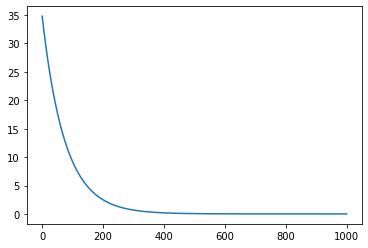

In [8]:
class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    #write code here
    return w

  def error(self,w,y,x):
    return # write code here

  def mat_inv(self,y,x_aug):
    return # write code here
    
  # By Gradien descent

  def Regression_grad_des(self,x,y,lr):
    
    for i in range(1000):
      # write code here

      dev=np.abs(# write code here)
          # print(i)
      if dev<=0.000001:
        break

    return w_pred,err


#############################################################################
# Generation of data

sim_dim=5
sim_no_data=1000
x=np.random.uniform(-1,1,(sim_dim,sim_no_data))
print("Initial data shape: ", x.shape)

w = np.array([1, 2, 3, 4, 5, 6]) ## Write your code here (Initialise the weight matrix) (W=[w0,w1,.....,wM]')
print("Dimension of Weight matrix: ", w.shape)

## Augment the Input
x_aug = np. ## Write your code here (Augment the data so as to include x0 also which is a vector of ones)
print("Data shape after augmenting: ", x_aug.shape)

y=x_aug.T @ w  # vector multiplication
print("Shape of Output: ", y.shape)

## Corrupt the input by adding noise 
noise=np.random.uniform(0,1,y.shape)
y=y+0.1*noise

### The data (x_aug and y) is generated ###

#############################################################################

# By Computation (Normal Equation)
reg = regression()
w_opt=reg.mat_inv(y,x_aug)
print("Optimal weights obatained by computation: ", w_opt)

# By Gradien descent
lr=0.01
w_pred,err=reg.Regression_grad_des(x_aug,y,lr)
print("Optimal weights obatained by Gradient descent: ", w_pred)

plt.plot(err)


#Practical Example (Salary Prediction)

1. Read data from csv file
2. Do train test split (90% and 10%)
3. Compute optimal weight values and predict the salary using the regression class created above (Use both the methods)
4. Find the mean square error in test.
5. Also find the optimal weight values using regression class from the Sci-kit learn library

In [11]:
## Write your code here
